# TP1

In [1]:
import numpy as np
import time as tm
import math as ma
import random as rd
import matplotlib.pyplot as plt

def f1(x):
        return abs(x - 100)
        
def f2(x):
        if (x >= 50):
            return np.sqrt(x - 50)
        else:
            return np.sqrt(-(x- 50))
        
def f3(x):
    if (x * 4 < x + 5):
        return x * 4
    return x + 5
        
def f4(x):
        return -x**3

## 1. Méthode de recherche dichotomique

### Q1

Par l'absurde, x* n'est pas dans l'intervalle supposé.

### Q2

In [2]:
def dicho(f, a, b):
    if ( (b - a) <  10**(-7) ):
        return b
        
    else:
        xg = a + 1/4 * (b - a)
        xc = a + 1/2 * (b - a)
        xd = a + 3/4 * (b - a)
        
        fxg = f(xg)
        fxc = f(xc) 
        fxd = f(xd)

        if (fxc > fxd):
            a = xc

        elif (fxc > fxg):
            b = xc

        else:
            a = xg
            b = xd
        
    return dicho(f, a, b)
        
a = -1000
b = 1000
        
print(f"f1 : x* = {dicho(f1, a, b)}")
print(f"f2 : x* = {dicho(f2, a, b)}")
print(f"f3 : x* = {dicho(f3, a, b)}")
print(f"f4 : x* = {dicho(f4, a, b)}")


f1 : x* = 100.0000000349246
f2 : x* = 50.0000000174623
f3 : x* = -999.9999999417923
f4 : x* = 1000


## 2. Méthode du nombre d’or

### Q3

Par l'absurde, x* n'est pas dans l'intervalle supposé.

### Q4

Avec $v = \frac{w}{\alpha}$

Pour $x_{k}^G$ :

$x_{k}^G = b_{k} - v $

$x_{k}^G = b_{k} - \frac{w}{\alpha} $

$x_{k}^G = b_{k} - \frac{(b_{k} - a_{k})}{\alpha}$ 

Pour $x_{k}^D$ :

$x_{k}^D = a_{k} + v $

$x_{k}^D = a_{k} + \frac{w}{\alpha} $

$x_{k}^D = a_{k} + \frac{(b_{k} - a_{k})}{\alpha}$ 

### Q5

Pour que l'intervalle soit équiréparti, il faut que $\alpha$ soit égal à 1.5.

### Q6

Il faut donc faire appel à la fonction f 2 fois.

### Q7

Il faut que la distance entre $x_{k}^G$ et $x_{k}^D$ soit au centre de l'intervalle $a_{k}$ et $b_{k}$.

### Q8

$\alpha$ = 1.62

### Q9

L'intervalle se réduit avec un quotient de 1.62.

### Q10

Un des points $x_{k}^G$ deviendra $x_{k}^D$ à la prochaine itération donc il y a donc une seule évaluation de f.

### Q11

In [3]:
def nb_or(f, a, b, alpha):
    if ( (b - a) <  10**(-7) ):
        return b
        
    else:
        xg = b - (b - a) / alpha
        xd = a + (b - a) / alpha
        
        fxg = f(xg)
        fxd = f(xd)

        if (fxg > fxd):
            a = xg

        elif (fxg < fxd):
            b = xd

        else:
            a = xg
            b = xd
        
    return nb_or(f, a, b, alpha)

a = -1000
b = 1000
alpha = 1.62

print(f"f1 : x* = {nb_or(f1, a, b, alpha)}")
print(f"f2 : x* = {nb_or(f2, a, b, alpha)}")
print(f"f3 : x* = {nb_or(f3, a, b, alpha)}")
print(f"f4 : x* = {nb_or(f4, a, b, alpha)}")

f1 : x* = 100.00000005384575
f2 : x* = 50.00000002205006
f3 : x* = -999.9999999331227
f4 : x* = 1000


## 3. Application : Problème d’abonnement avec pénalité

### Q12

In [4]:
def f(p, L, a, b):
    s = 0
    for i in range (1, len(L)):
        s += ((max(0, L[i] - p))**2)
    return a * p + b * np.sqrt(s)

### Q13



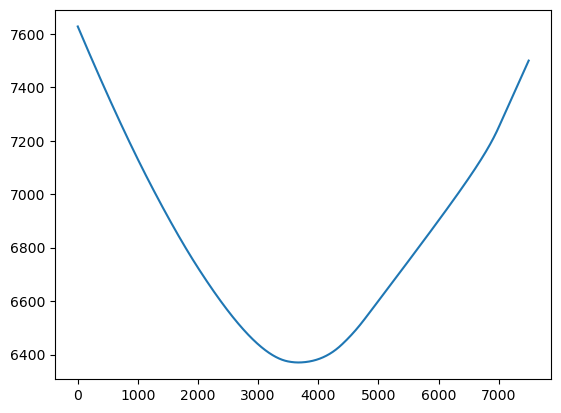

In [5]:
L = [2500, 3500, 4380, 4389, 4725, 4800, 3700, 3500, 7000, 7500, 2000, 1200]

C = max(L)

X = []
Y = []

for p in range (0, C):
    X.append(p)
    Y.append(f(p, L, 1, 0.5))
    
fig, ax = plt.subplots()
ax.plot(X, Y)
plt.show()


### Q14

version dicho : f : x* = 3671.264648464785


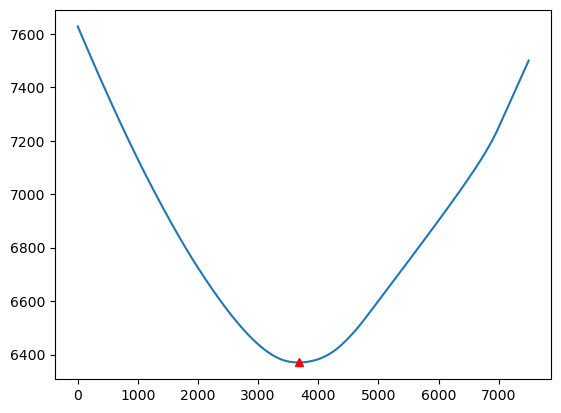

In [6]:
def dicho_v2(f, a, b):
    if ( (b - a) <  10**(-7) ):
        return b
        
    else:
        xg = a + 1/4 * (b - a)
        xc = a + 1/2 * (b - a)
        xd = a + 3/4 * (b - a)
        
        fxg = f[int(xg)]
        fxc = f[int(xc)]
        fxd = f[int(xd)]

        if (fxc > fxd):
            a = xc

        elif (fxc > fxg):
            b = xc

        else:
            a = xg
            b = xd
        
        return dicho_v2(f, a, b)
a = 1
b = 0.5

y = [f(i, L, a, b) for i in range (0, max(L))]
x = [i for i in range(0, max(L))]

min = dicho_v2(y, 0, max(L))

print(f"version dicho : f : x* = {min}")

plt.plot(x, y)
plt.plot(min, f(min, L, a, b), 'r^')
plt.show()

### Q15

version nb d'or : f : x* = 3671.719706997583


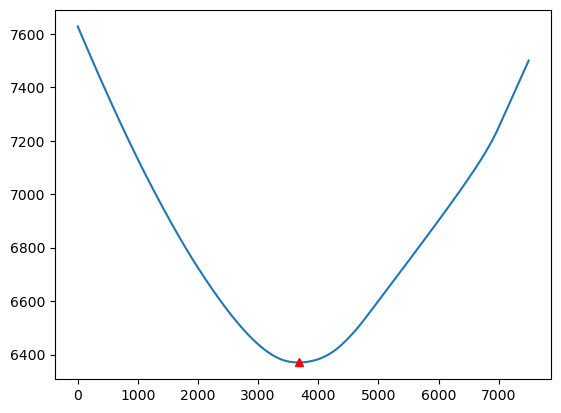

In [7]:
def nb_or_v2(f, a, b, alpha):
    if ( (b - a) <  10**(-7) ):
        return b
        
    else:
        xg = b - (b - a) / alpha
        xd = a + (b - a) / alpha
        
        fxg = f[int(xg)]
        fxd = f[int(xd)]

        if (fxg > fxd):
            a = xg

        elif (fxg < fxd):
            b = xd

        else:
            a = xg
            b = xd
        
        return nb_or_v2(f, a, b, alpha)

a = 1
b = 0.5
alpha = 1.62

y = [f(i, L, a, b) for i in range (0, max(L))]
x = [i for i in range(0, max(L))]

min = nb_or_v2(y, 0, max(L), alpha)

print(f"version nb d'or : f : x* = {min}")

plt.plot(x, y)
plt.plot(min, f(min, L, a, b), 'r^')
plt.show()

### Q16

In [8]:
start = tm.time()

for i in range(500):
    L = [rd.randint(2000, 7500) for i in range(12)]
    y = [f(i, L, a, b) for i in range (0, max(L))]
    x = [i for i in range(0, max(L))]
    
    min = dicho_v2(y, 0, max(L))
    
end = tm.time()

print(f"temps d'execution : {end - start}ms")

temps d'execution : 33.01254463195801ms


In [9]:
start = tm.time()

for i in range(500):
    L = [rd.randint(2000, 7500) for i in range(12)]
    y = [f(i, L, a, b) for i in range (0, max(L))]
    x = [i for i in range(0, max(L))]
    
    min = nb_or_v2(y, 0, max(L), alpha)
    
end = tm.time()

print(f"temps d'execution : {end - start}ms")

temps d'execution : 43.659074544906616ms


On voit ici que les deux temps sont à peu près similaires mais que la recherche avec la dichotomie est plus rapide que la recherche dichotomique.